## In-Class Exercise 2: Clustering (k-Means)

Step 1: Create three clusters of data, 

$\left \{x_i^j  \in \mathbb{R}^2\right \}_{i=1}^{1000} \sim  N(\mu _j,\Sigma _j), \space j=1,2,3$

Color: j = 1 (Red), j = 2 (Green), j = 3 (Blue)

Means:

$\mu _1 = \begin{bmatrix}1\\0\end{bmatrix}$

$\mu _2 = \begin{bmatrix}-1\\0\end{bmatrix}$

$\mu _3 = \begin{bmatrix}0\\-10\end{bmatrix}$

Covariance Matrices:

$\Sigma _1 = U\Lambda _1 U^T$

$\Sigma _2 = U\Lambda _2 U^T$

$\Sigma _3 = I$

$U = \begin{bmatrix}\frac{1}{\sqrt{2}}&\frac{-1}{\sqrt{2}}\\\frac{1}{\sqrt{2}}&\frac{1}{\sqrt{2}}\end{bmatrix}$

$\Lambda _1 = \begin{bmatrix}4&0\\0&1\end{bmatrix}$

$\Lambda _2 = \begin{bmatrix}1&0\\0&5\end{bmatrix}$

Training Data, Means, and variances

[]

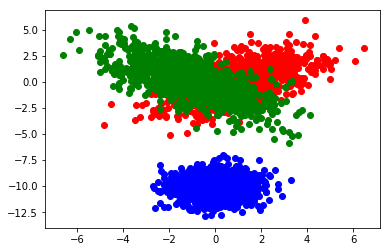

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.linalg
import scipy.stats

#Training Data
training_data = np.zeros((3000,2))
n = len(training_data)
k = 3
m = 2

mu = np.zeros((k,m))
sigma = np.zeros((k,m,m))

mu[0] = np.array([1,0])
mu[1] = np.array([-1,0])
mu[2] = np.array([0,-10])

u = np.array([[1/np.sqrt(2),-1/np.sqrt(2)],[1/np.sqrt(2),1/np.sqrt(2)]])
lambda1 = np.array([[4,0],[0,1]])
lambda2 = np.array([[1,0],[0,5]])

sigma[0] = u@lambda1@u.T
sigma[1] = u@lambda2@u.T
sigma[2] = np.identity(2)

#3000 training data points that come from 3 different normal distributions
training_data[0:1000] = scipy.stats.multivariate_normal(mu[0],sigma[0]).rvs(1000)
training_data[1000:2000] = scipy.stats.multivariate_normal(mu[1],sigma[1]).rvs(1000)
training_data[2000:3000] = scipy.stats.multivariate_normal(mu[2],sigma[2]).rvs(1000)

#Plotting the generated training points and color coding to visualize what distribution they came from
plt.scatter(training_data[0:1000,0], training_data[0:1000,1], c="red")
plt.scatter(training_data[1000:2000,0], training_data[1000:2000,1], c="green")
plt.scatter(training_data[2000:3000,0], training_data[2000:3000,1], c="blue")
plt.plot()

Initializing each data sample to a random cluster 

[]

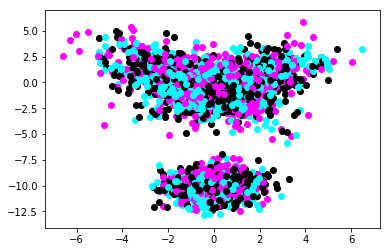

In [2]:
mean = np.zeros((k,m)) #Initializing means for clusters
cluster = np.zeros((n)) #Array to hold the current cluster for each training sample
population = np.zeros((k)) #Array to hold the number of data samples in a given cluster
for j in range(n):
        cluster[j] = np.random.randint(0,k) #Random Initialization of Clusters
        
#Plotting randomized cluster initializations (Color to visually differentiate the clusters, no relation to how the data was generated)
colors = np.array(["black", "magenta", "cyan"])
for z in range(n):
    plt.scatter(training_data[z,0], training_data[z,1], c=colors[int(cluster[z])])
plt.plot() 

Running k-means algorithm, and stopping when the algorithm converges. Convergence occurs when there is no change in the cluster assignments after an iteration.

In [3]:
change = True #Variable to test whether change in clusters occured
num_of_iter = 0 #Measure of how many iterations until convergence

while change:
    mean = np.zeros((k,m)) #Reset the means of each cluster to zero for new iteration
    population = np.zeros((k)) #Reset the population of each cluster to zero for new iteration
    change = False #Reset change in cluster variable
    
    for j in range(n):
        population[int(cluster[j])]+=1 #Calculate number of data samples in each cluster
        mean[int(cluster[j])]+=training_data[j] #Calculate sum of all data samples of each cluster
    for j in range(k):
        mean[j]/=population[j] #Divide each sum by the population of each cluster to get the mean of each cluster
    
    #For all data samples, change cluster to the cluster with the nearest mean
    for j in range(n):
        for m in range(k):
            #Checks the distance from point to centroids that do not include the current centroid
            if m != int(cluster[j]):
                if np.linalg.norm(training_data[j]-mean[m]) < np.linalg.norm(training_data[j]-mean[int(cluster[j])]):
                    cluster[j] = m #Change cluster of data sample j to cluster m
                    change = True #Change in clusters occured
    num_of_iter += 1

print("k-means converged after ", num_of_iter, "iterations")

k-means converged after  25 iterations


Plotting the final clusters for the converged k-means algorithm. Also plotting the final centroids of each cluster.

[]

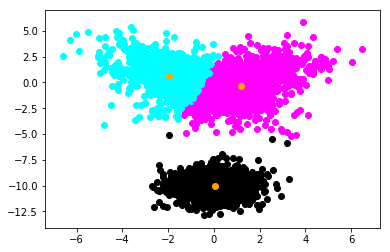

In [4]:
#Plotting data for 3 clusters
colors = np.array(["black", "magenta", "cyan"])
for z in range(n):
    plt.scatter(training_data[z,0], training_data[z,1], c=colors[int(cluster[z])]) #Plotting data with color based on final cluster assignment
for y in range(k):
    plt.scatter(mean[y,0], mean[y,1], c="orange") #Plotting means
#plt.gca().set_aspect('equal', adjustable='box')
plt.plot() 